<a href="https://colab.research.google.com/github/rafaelcamelo31/Introdu-o-a-Data-Science/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as notas em geral

In [2]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.shape

(100836, 4)

In [4]:
print("Média", ratings.rating.mean())
print("Mediana", ratings.rating.median())

Média 3.501556983616962
Mediana 3.5


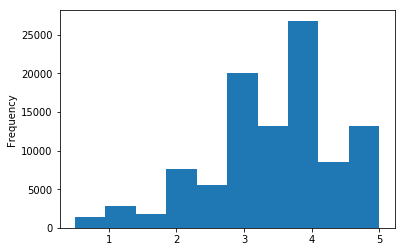

In [5]:
ratings.rating.plot(kind='hist')

In [6]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

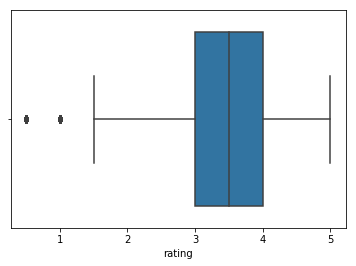

In [7]:
import seaborn as sns

sns.boxplot(ratings.rating)

#Olhando os Filmes

In [8]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas especificas por filme

In [9]:
ratings.query('movieId==1').rating.mean()

3.9209302325581397

In [10]:
mean_movie_ratings = ratings.groupby('movieId').rating.mean()
mean_movie_ratings.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

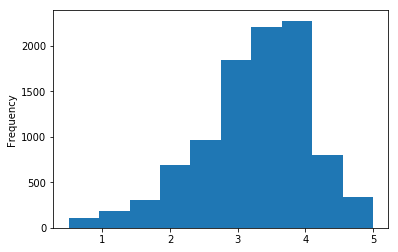

In [11]:
mean_movie_ratings.plot(kind = 'hist')

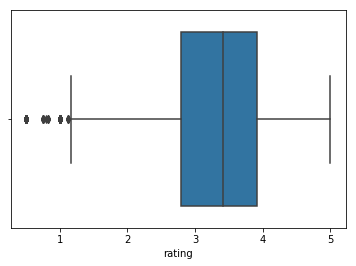

In [12]:
sns.boxplot(mean_movie_ratings)

In [14]:
mean_movie_ratings.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

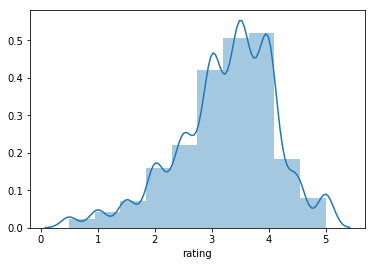

In [18]:
sns.distplot(mean_movie_ratings, bins=10)

Text(0.5, 1.0, 'Histograma das médias das notas do filme')

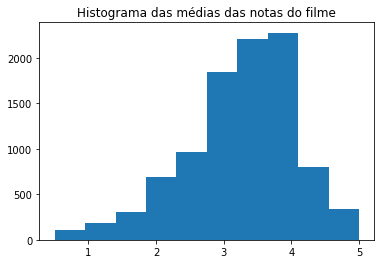

In [20]:
import matplotlib.pyplot as plt

plt.hist(mean_movie_ratings)
plt.title('Histograma das médias das notas do filme')

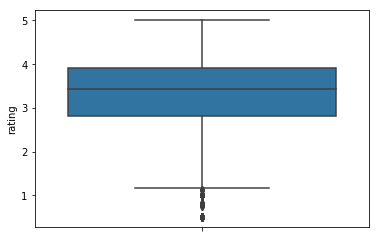

In [21]:
sns.boxplot(y=mean_movie_ratings)

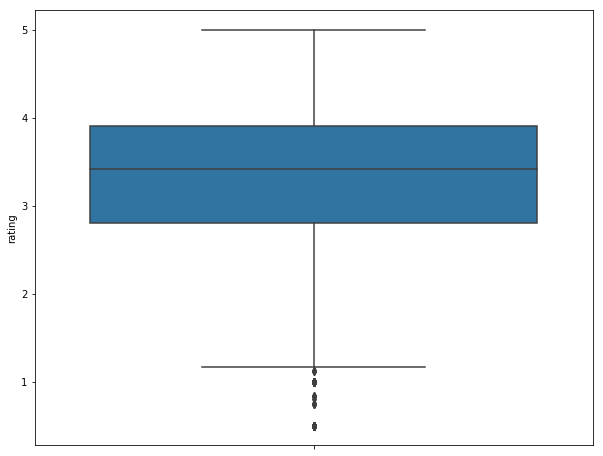

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(y = mean_movie_ratings)
